<a href="https://colab.research.google.com/github/dreamtim1/Python-practice/blob/master/Sieve_of_Eratosthenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will implement the Sieve of Eratosthenes, using NumPy.

We will also test its execution time and visualize it with Matplotlib.

In [ ]:
"""Sieve of Eratosthenes impementation with numpy"""

import numpy as np

def erato(n):
    """Finds all the prime numbers under given number (> 2), returns a numpy array"""

    nums = np.arange(2, n, dtype='int64')
    iter_0 = ((nums % nums[0]) != 0) * nums
    primes = np.array([2], dtype='int64')
    stop_prime = np.int64((n ** 0.5) + 1)

    for i in range(n):
        # We use argmax, because it stops after first match
        # Unlike nonzero, we don't create a huge extra array
        first_non_zero = np.argmax(iter_0 > 0)
        another_prime = nums[first_non_zero]

        if another_prime >= stop_prime:
            break

        iter_0 = ((iter_0 % another_prime) != 0) * iter_0

        primes = np.append(primes, another_prime)
        
    # Append to the primes remaining non zero numbers
    primes = np.concatenate([primes, iter_0[iter_0 != 0]])

    return primes

Let's write a test for our function, using a list of prime numbers from the Internet.

In [ ]:
def test_100():
    n = 100
    answer = np.fromstring('2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97', sep=', ')
    assert np.array_equiv(answer, erato(n)) == True

Now we can test it!

In [ ]:
test_100()

The `test_100()` doesn't raise any error, it is also possible to test it with different numbers.

In [ ]:
n = int(input('Enter n: '))
print(erato(n))

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]


Everything works! Now let's measure the execution time.

In [ ]:
def measure_time():
    """Measures execution time of the erato(10**n), returns 2 numpy arrays: used inputs and times"""
    
    from timeit import repeat
    from itertools import chain

    # We create generators to freeze the calculations
    # It doesn't really matter inside the function, but it's useful for interactive debugging 
    # We use smaller number of repeats for big n

    measure_small = (repeat(lambda: erato(10**n), number = 1, repeat=1000) for n in range(1, 5))
    measure_small_means = (np.array(times, dtype='float64').mean() for times in measure_small)

    measure_large = (repeat(lambda: erato(10**n), number = 1, repeat=10) for n in range(5, 8))
    measure_large_means = (np.array(times, dtype='float64').mean() for times in measure_large)

    measure_all_means = chain(measure_small_means, measure_large_means)

    measurements = np.fromiter(measure_all_means, dtype='float64')
    inputs = np.arange(1, 8, dtype='int8')

    return inputs, measurements



The measurements will take a lot of time (about 5 mins)!

In [ ]:
inputs, measurements = measure_time()

In [ ]:
inputs

array([1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [ ]:
measurements

array([3.23201570e-05, 5.20519229e-05, 1.72473491e-04, 1.46953763e-03,
       3.57415674e-02, 1.22144808e+00, 3.58639896e+01])

No let's create a simple plot to show dependence of the execution time on the ammount of data.

In [ ]:
def plot_time(inputs, measurements):
    """Visualizes the dependence of the execution time on n"""

    import matplotlib.pyplot as plt

    x_axis = [f'10^{n}' for n in inputs]

    # Logarithmic scale for better representation
    y_axis = np.log(measurements)

    plt.plot(x_axis, y_axis)

    plt.xlabel('n')
    plt.ylabel('ln(time)')

    plt.title('Dependence of the execution time on the ammount of data (logarithmic scale)')

    plt.show()


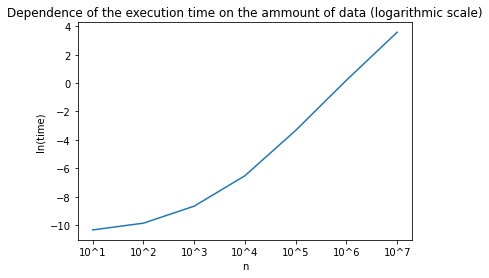

In [ ]:
plot_time(inputs, measurements)